In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target
print(X)
print(y)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [2]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8888888888888888


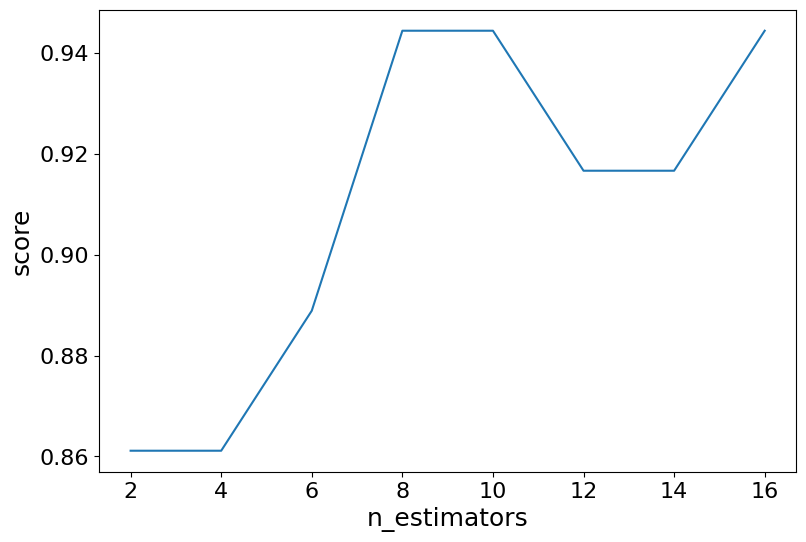

In [3]:
estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)
    clf.fit(X_train, y_train)

    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)
plt.show()

[Text(0.5, 0.9, 'flavanoids <= 1.4\ngini = 0.666\nsamples = 98\nvalue = [51, 46, 45]'),
 Text(0.25, 0.7, 'color_intensity <= 3.45\ngini = 0.117\nsamples = 31\nvalue = [0, 3, 45]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 3, 0]'),
 Text(0.375, 0.5, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 45]'),
 Text(0.75, 0.7, 'alcohol <= 13.06\ngini = 0.496\nsamples = 67\nvalue = [51.0, 43.0, 0.0]'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'proline <= 742.0\ngini = 0.122\nsamples = 34\nvalue = [3, 43, 0]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 42, 0]'),
 Text(0.75, 0.3, 'malic_acid <= 1.56\ngini = 0.375\nsamples = 4\nvalue = [3, 1, 0]'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.875, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [48, 0, 0]')]

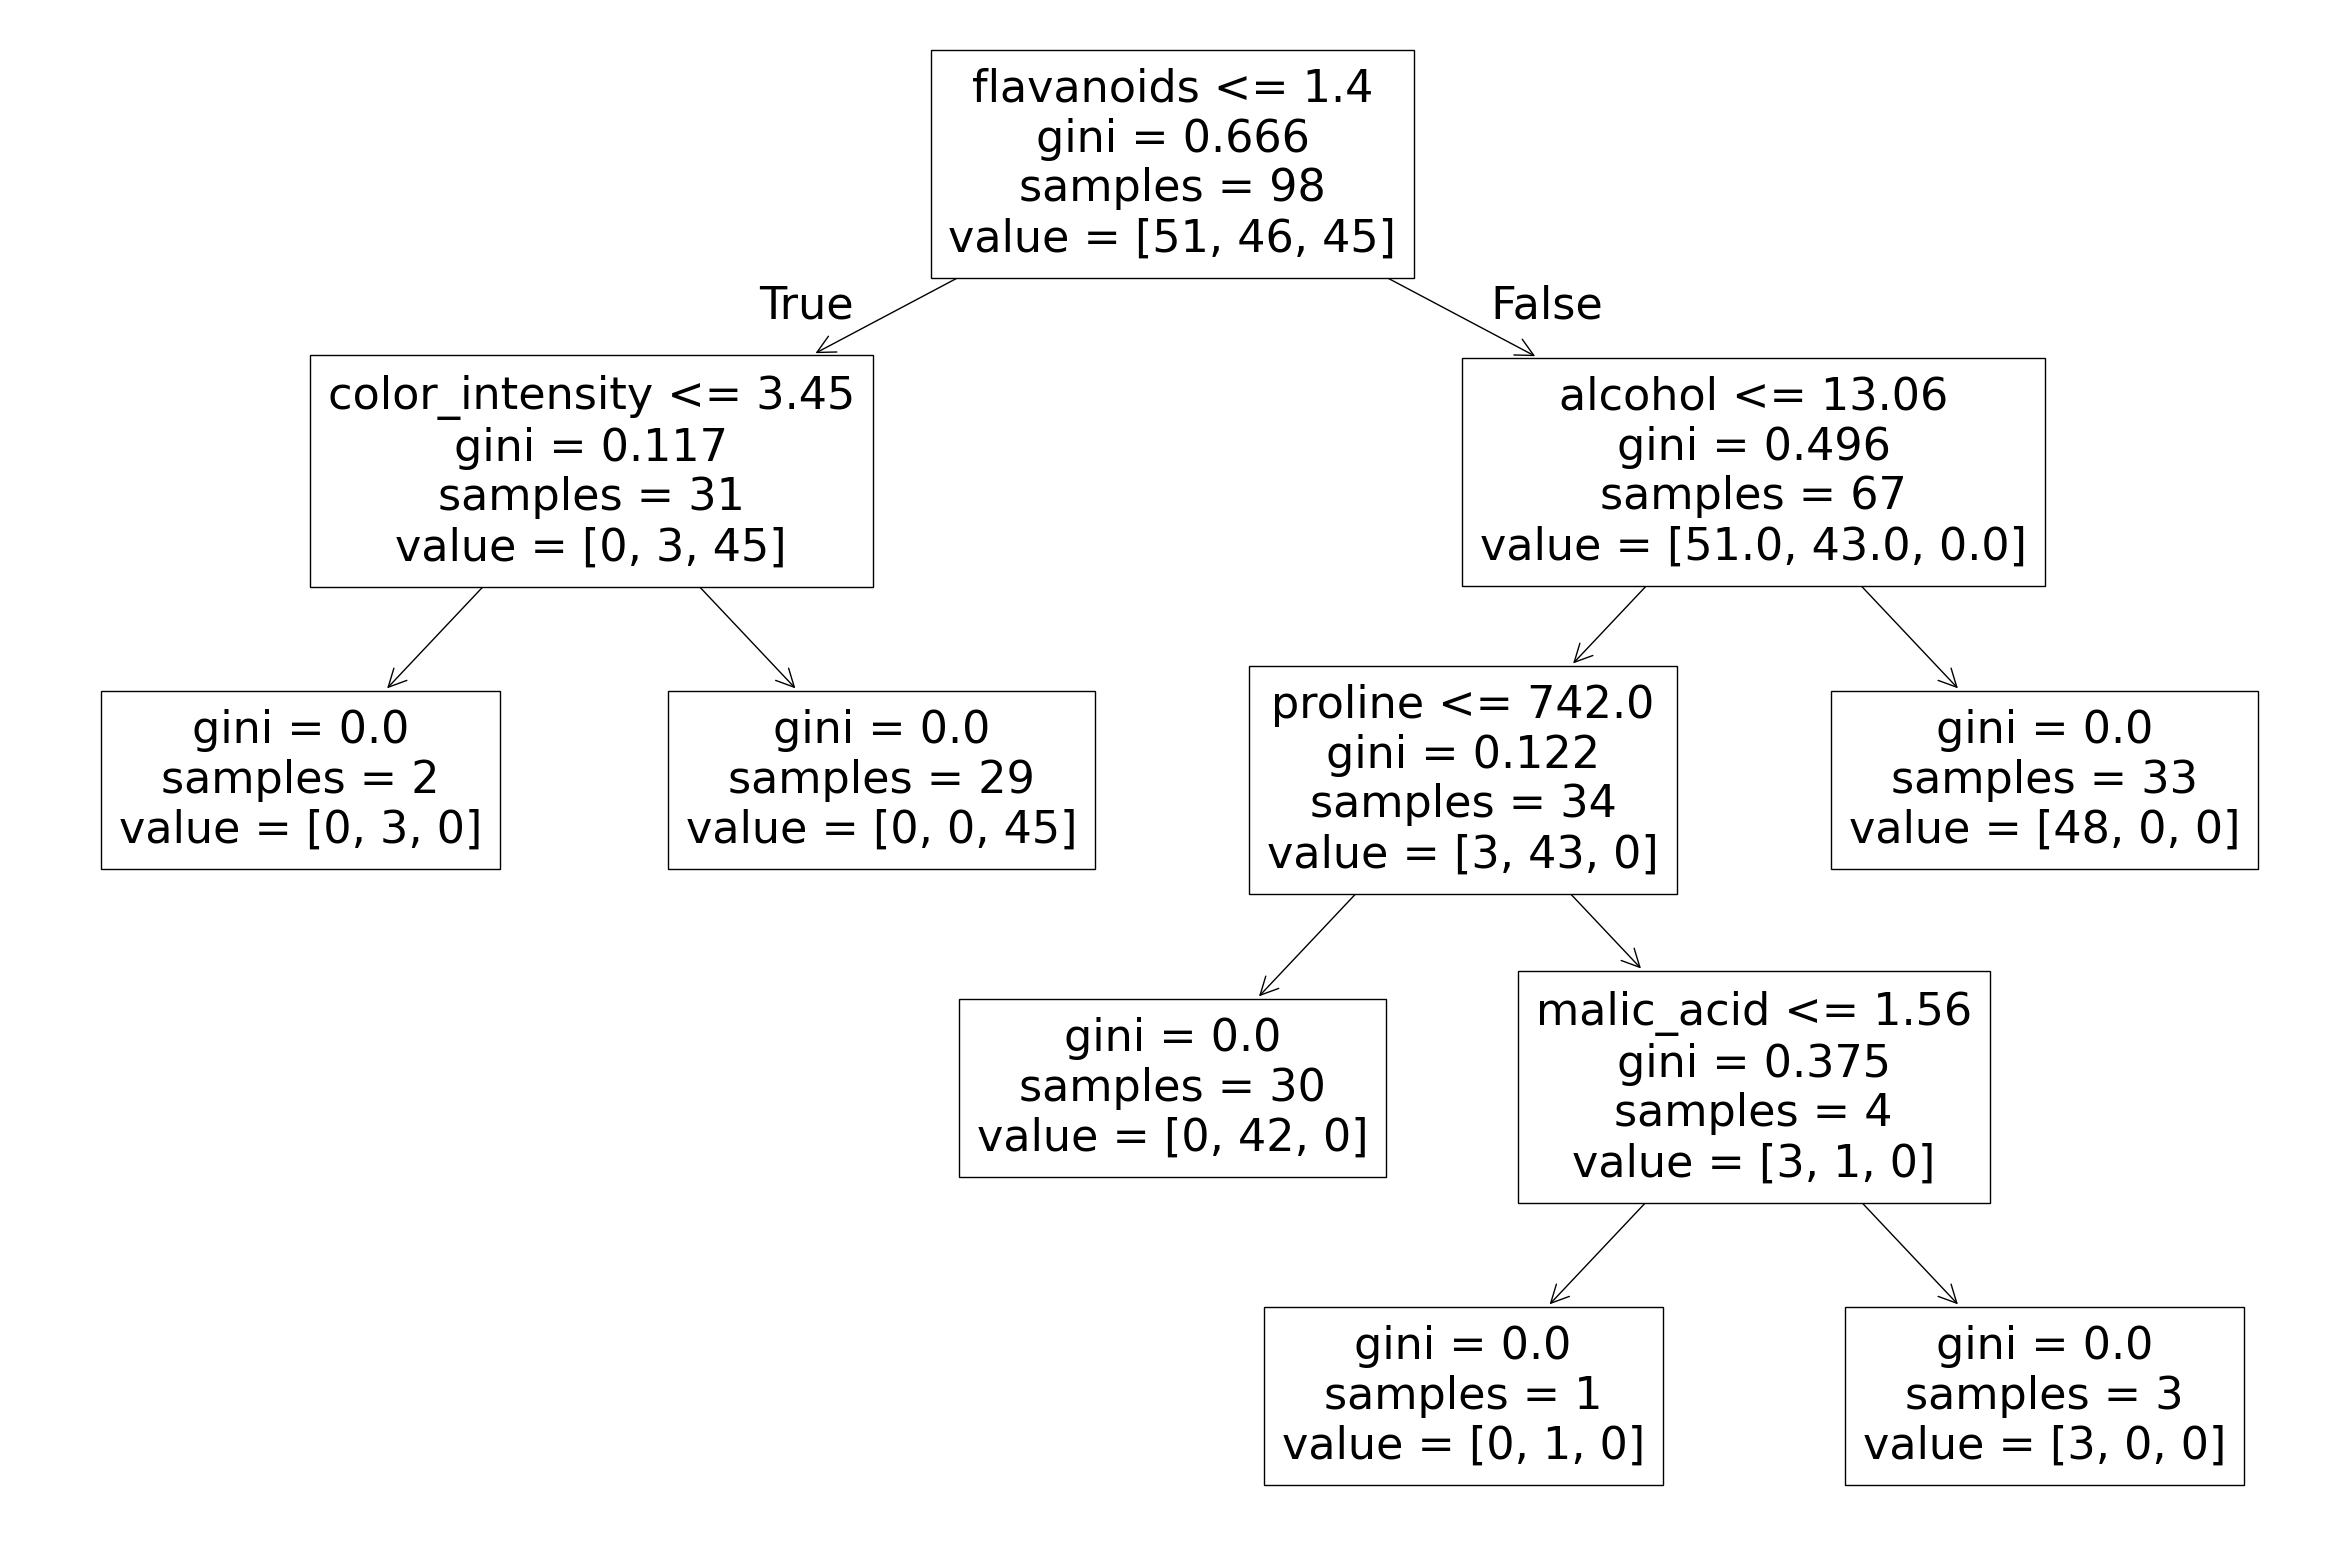

In [4]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 20))

plot_tree(clf.estimators_[1], feature_names = X.columns)